# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Lutfi Robbani
- **Email:** lutfinaks22bkz@gmail.com
- **ID Dicoding:** MC009D5Y2051

## Import Semua Packages/Library yang Digunakan

In [2]:
import os
import random
import shutil
import zipfile

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflowjs as tfjs
from keras.layers import TFSMLayer
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


saya mengimpor semua library yang di perlukan dalam projek  ini

## Data Preparation

### Data Loading

In [3]:
zip_path = '/content/drive/MyDrive/dataset_hewan.zip'
extract_path = '/content/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Selesai ekstrak!")


Selesai ekstrak!


kemudian saya ekstrak dataset yang sudah saya miliki di google drive, lalu setelah menyimpaan hasil nya di local direktori google collab

In [4]:
kelas = {
    'Anjing': '/content/dataset_hewan/anjing',
    'Laba-Laba': '/content/dataset_hewan/laba-laba',
    'Kupu-Kupu': '/content/dataset_hewan/kupu-kupu'
}

total = 0
for nama, path in kelas.items():
    jumlah = len([f for f in os.listdir(path) if f.lower().endswith('.jpeg')])
    print(f'Jumlah Data {nama}: {jumlah}')
    total += jumlah

print(f'Total Dataset: {total}')

Jumlah Data Anjing: 4863
Jumlah Data Laba-Laba: 4497
Jumlah Data Kupu-Kupu: 1650
Total Dataset: 11010


**dataset terdiri dari 3 kelas :**

1. dataset anjing dengan total 4863 gambar
2. dataset laba-laba dengan total 4497 gambar
3. dataset kupu-kupu dengan total 1650 gambar

jadi total dataset yang saya gunakan untuk projek klasifikasi gambar ini adalah 11010 gambar

### Data Preprocessing

#### Split Dataset

In [6]:
base_output = '/content/dataset_split'
os.makedirs(base_output, exist_ok=True)

train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

for nama_kelas, path in kelas.items():
    semua_file = [f for f in os.listdir(path) if f.lower().endswith(('.jpeg'))]
    random.shuffle(semua_file)

    total = len(semua_file)
    train_end = int(train_ratio * total)
    val_end = train_end + int(val_ratio * total)

    dataset_split = {
        'train': semua_file[:train_end],
        'val': semua_file[train_end:val_end],
        'test': semua_file[val_end:]
    }

    for split, files in dataset_split.items():
        target_folder = os.path.join(base_output, split, nama_kelas)
        os.makedirs(target_folder, exist_ok=True)
        for f in files:
            shutil.copy(os.path.join(path, f), os.path.join(target_folder, f))

print("Dataset berhasil di split")


Dataset berhasil di split


setelah itu setiap kelas saya split menjadi 3 bagian :   

1. 80% data untuk training
2. 20% data untuk validasi
3. 10% data untuk testing

untuk masing masing data training, val, test di random

## Modelling

In [9]:
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

batch_size = 32
img_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=img_size, batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, image_size=img_size, batch_size=batch_size
)

Found 10056 files belonging to 3 classes.
Found 3976 files belonging to 3 classes.


lalu gambar dari direktori train dan validasi disiapkan untuk melakukan training model, gambar gambar tersebut akan di training dengan format tensorflow dan gambar nya di resize dengan ukuran (224, 224)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_ds.cardinality().numpy(), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


kemudian gambar di deteksi dengan menggunakan metode Conv2D, MaxPooling dan Faltten sebelum masuk ke modeling data

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

kalu buat compile model dan callback yang akan berhenti jika akurasi tidak naik dalam 10 kali pelatihan atau epoch

In [12]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5403 - loss: 10.2343

315/315 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.5406 - loss: 10.2107 - val_accuracy: 0.7528 - val_loss: 0.5671
Epoch 2/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7704 - loss: 0.5779

315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.7705 - loss: 0.5776 - val_accuracy: 0.8421 - val_loss: 0.4080
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8347 - loss: 0.4456

315/315 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8347 - loss: 0.4455 - val_accuracy: 0.8785 - val_loss: 0.3263
Epoch 4/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8535 - loss: 0.3990

315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.8536 - loss: 0.3987 - val_accuracy: 0.8946 - val_loss: 0.3059
Epoch 5/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8927 - loss: 0.2972

315/315 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.8927 - loss: 0.2970 - val_accuracy: 0.9127 - val_loss: 0.2730
Epoch 6/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9123 - loss: 0.2391

315/315 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9123 - loss: 0.2390 - val_accuracy: 0.9349 - val_loss: 0.2243
Epoch 7/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9269 - loss: 0.2100

315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9269 - loss: 0.2099 - val_accuracy: 0.9494 - val_loss: 0.1806
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.9329 - loss: 0.1897 - val_accuracy: 0.9472 - val_loss: 0.1967
Epoch 9/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9449 - loss: 0.1620 - val_accuracy: 0.9552 - val_loss: 0.1834
Epoch 10/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9523 - loss: 0.1394 - val_accuracy: 0.9339 - val_loss: 0.2686
Epoch 11/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9494 - loss: 0.1526

315/315 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.9495 - loss: 0.1524 - val_accuracy: 0.9673 - val_loss: 0.1781
Epoch 12/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9570 - loss: 0.1255 - val_accuracy: 0.9605 - val_loss: 0.2072
Epoch 13/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9687 - loss: 0.1046 - val_accuracy: 0.9497 - val_loss: 0.2178
Epoch 14/100
314/315 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9663 - loss: 0.1081

315/315 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9663 - loss: 0.1080 - val_accuracy: 0.9650 - val_loss: 0.1690
Epoch 15/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9757 - loss: 0.0830 - val_accuracy: 0.9618 - val_loss: 0.2033
Epoch 16/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9683 - loss: 0.1041 - val_accuracy: 0.9530 - val_loss: 0.1978
Epoch 17/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.9643 - loss: 0.1144 - val_accuracy: 0.9271 - val_loss: 0.3137
Epoch 18/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9626 - loss: 0.1249 - val_accuracy: 0.9681 - val_loss: 0.1808
Epoch 19/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.9719 - loss: 0.0987 - val_accuracy: 0.9557 - val_loss: 0.2249
Epoch 20/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9626 - loss: 0.1361 - val_accuracy: 0.9510 - val_loss: 0.2929
Epoch 21/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9776 - loss: 0.0751

kemudian lakukan training dengan epoch 100 kali

In [13]:
model = keras.models.load_model('/content/best_model.h5')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset_split/test',
    image_size=(224, 224),
    batch_size=32
)


loss, accuracy = model.evaluate(test_ds)
print(f"Akurasi Model: {accuracy:.2%}")


Found 2105 files belonging to 3 classes.
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9576 - loss: 0.1829
Akurasi Model: 95.77%


lalu lakukan akurasi dengan data split test disini akurasi dari model nya 95.77%

## Evaluasi dan Visualisasi

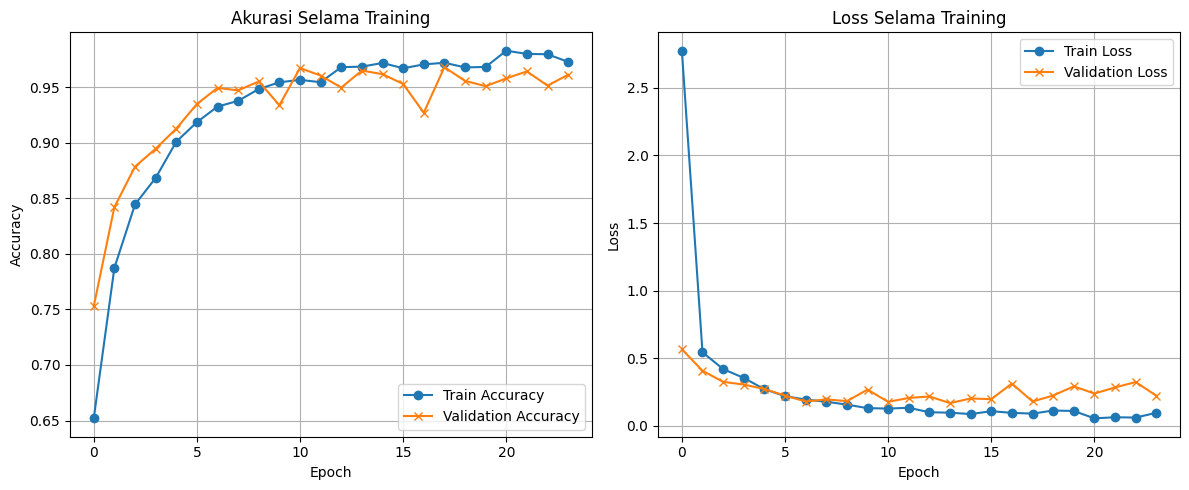

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


kemudian saya melakukan evaluasi dalam bentuk visual grafik terdapat titik loss dan akurasi untuk setiap epochnya

## Konversi Model

In [15]:
model = keras.models.load_model('/content/best_model.h5')

model.export('/content/saved_model')


Saved artifact at '/content/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 315), dtype=tf.float32, name=None)
Captures:
  137690476654864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137689491307984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137689491307024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690476656016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690476655632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137689491303760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461967632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461969360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461968592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461970896: TensorSpec(shape=(), dtype=tf.resource, name=None)


saya mengkonversi ke bentuk saved_model

In [16]:
model = tf.keras.models.load_model('/content/best_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TFLite dan disimpan di /content/model.tflite")


Saved artifact at '/tmp/tmpjwm6e_f2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 315), dtype=tf.float32, name=None)
Captures:
  137688461973200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461975696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461975888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461974928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461975120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461974160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461974352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461973392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461971280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137688461977616: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil 

saya mengkonversi ke bentuk TensorFlow lite

In [17]:
model = tf.keras.models.load_model('/content/best_model.h5')

tfjs_target_dir = '/content/tfjs_model'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

print(f"Model berhasil dikonversi ke TFJS dan disimpan di: {tfjs_target_dir}")

failed to lookup keras version from the file,
    this is likely a weight only file
Model berhasil dikonversi ke TFJS dan disimpan di: /content/tfjs_model


saya mengkonversi ke bentuk TensorFlow js

## Inference (Optional)

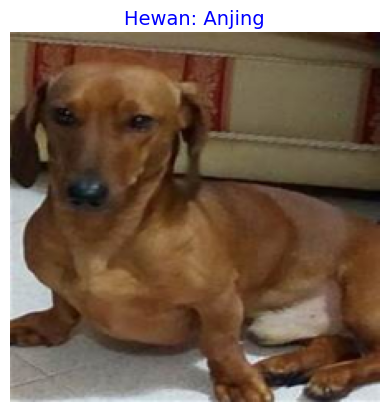

In [26]:
model = TFSMLayer('/content/saved_model', call_endpoint='serving_default')

class_names = ['Anjing', 'Kupu-Kupu', 'Laba-Laba']

img_size = (224, 224)

def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB').resize(img_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)
    return img, img_array

image_path = '/content/dataset_split/test/Anjing/OIP-0YsYBkNjUXqvOr300zCUsgHaJV.jpeg'
img_display, input_data = preprocess_image(image_path)

output = model(input_data)
predicted_label = class_names[np.argmax(output)]

plt.imshow(img_display)
plt.axis('off')
plt.title(f"Hewan: {predicted_label}", fontsize=14, color='blue')
plt.show()


lalu saya melakukan percobaan di salah satu model yang telah saya konversi disini saya pakai model saved_model untuk melakukan inference